<a href="https://colab.research.google.com/github/Eswar-8/Nifty-50_Financial-Data-Scrapper-and-Visualizer/blob/main/Nifty50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url="https://www.moneycontrol.com/stocks/marketstats/indexcomp.php?optex=NSE&opttopic=indexcomp&index=9"

In [3]:
r=requests.get(url)
nifty50=BeautifulSoup(r.content,"html.parser")
nifty50

<!DOCTYPE html>
<html lang="en"><head><link as="style" href="https://accounts.moneycontrol.com/assets/css/mclogin/bootstrap.min.css" rel="preload"/><link as="style" href="https://stat2.moneycontrol.com/mccss/headfoot/mc_header.css?v=1.11" rel="preload"/><meta charset="utf-8"/><title>Index Composition Nse, Stock/Share Indices, Sensex Indices, Composition Index, Stocks Gain / Lost</title><meta content="Index Composition Nse, share, Stock Indices, Sensex Indices, Composition Index, Stocks Gain / Lost - Moneycontrol.com" name="description"/><meta content="Index Composition Nse, share, Stock Indices, Sensex Indices, Composition Index, lost stocks,capital gain tax on stocks,highest gain stocks,top gain stocks,biggest gain stocks,stocks gain,stocks lost" name="Keywords"/><meta content="1800" http-equiv="refresh"/><meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0" name="viewport"/><meta content="index,follow" name="robots"/><meta content="index,follow" name="googlebot"/><

In [4]:
print(nifty50.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link as="style" href="https://accounts.moneycontrol.com/assets/css/mclogin/bootstrap.min.css" rel="preload"/>
  <link as="style" href="https://stat2.moneycontrol.com/mccss/headfoot/mc_header.css?v=1.11" rel="preload"/>
  <meta charset="utf-8"/>
  <title>
   Index Composition Nse, Stock/Share Indices, Sensex Indices, Composition Index, Stocks Gain / Lost
  </title>
  <meta content="Index Composition Nse, share, Stock Indices, Sensex Indices, Composition Index, Stocks Gain / Lost - Moneycontrol.com" name="description"/>
  <meta content="Index Composition Nse, share, Stock Indices, Sensex Indices, Composition Index, lost stocks,capital gain tax on stocks,highest gain stocks,top gain stocks,biggest gain stocks,stocks gain,stocks lost" name="Keywords"/>
  <meta content="1800" http-equiv="refresh"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0" name="viewport"/>
  <meta content="index,follow" name="robots"/>
  <meta con

In [5]:
stock_urls = []
for link in nifty50.find_all('a', href=True):
    if '/india/stockpricequote/' in link['href']:
        stock_urls.append(link['href'])
stock_urls

['https://www.moneycontrol.com/india/stockpricequote/trading/adanienterprises/AE13',
 'https://www.moneycontrol.com/india/stockpricequote/infrastructure-general/adaniportsspecialeconomiczone/MPS',
 'https://www.moneycontrol.com/india/stockpricequote/hospitals-medical-services/apollohospitalsenterprises/AHE',
 'https://www.moneycontrol.com/india/stockpricequote/paints-varnishes/asianpaints/AP31',
 'https://www.moneycontrol.com/india/stockpricequote/banks-private-sector/axisbank/AB16',
 'https://www.moneycontrol.com/india/stockpricequote/auto-2-3-wheelers/bajajauto/BA10',
 'https://www.moneycontrol.com/india/stockpricequote/finance-nbfc/bajajfinance/BAF',
 'https://www.moneycontrol.com/india/stockpricequote/finance-investments/bajajfinserv/BF04',
 'https://www.moneycontrol.com/india/stockpricequote/aerospace-defence/bharatelectronics/BE03',
 'https://www.moneycontrol.com/india/stockpricequote/refineries/bharatpetroleumcorporation/BPC',
 'https://www.moneycontrol.com/india/stockpricequote

In [6]:
OPEN = []
fields = ['Open','High', 'Low', 'Mkt Cap (Rs. Cr.)','Volume',
    'All Time High', 'All Time Low', 'Face Value',
    'UC Limit', 'LC Limit', '52 Week High', '52 Week Low'
]
for stock in stock_urls:
  stock_info = {'url': stock}
  r=requests.get(stock)
  company_data=BeautifulSoup(r.content,"html.parser")
   # Extract additional fields
  name=company_data.find('h1')
  stock_info['Company Name'] = name.get_text()
  sector_div = company_data.find('div', class_='inid_name')
  if sector_div:
    indus = sector_div.find('strong')
    stock_info['Industry'] = indus.get_text()

  for field in fields:
    fi=company_data.find('td',string=field)
    if fi:
      op=fi.find_next('td').text.strip()
      opp=int(float((op.replace(',',''))))
      stock_info[field] = opp
  OPEN.append(stock_info)
OPEN
stock_data_df = pd.DataFrame(OPEN)
print(stock_data_df)

                                                  url  \
0   https://www.moneycontrol.com/india/stockpriceq...   
1   https://www.moneycontrol.com/india/stockpriceq...   
2   https://www.moneycontrol.com/india/stockpriceq...   
3   https://www.moneycontrol.com/india/stockpriceq...   
4   https://www.moneycontrol.com/india/stockpriceq...   
5   https://www.moneycontrol.com/india/stockpriceq...   
6   https://www.moneycontrol.com/india/stockpriceq...   
7   https://www.moneycontrol.com/india/stockpriceq...   
8   https://www.moneycontrol.com/india/stockpriceq...   
9   https://www.moneycontrol.com/india/stockpriceq...   
10  https://www.moneycontrol.com/india/stockpriceq...   
11  https://www.moneycontrol.com/india/stockpriceq...   
12  https://www.moneycontrol.com/india/stockpriceq...   
13  https://www.moneycontrol.com/india/stockpriceq...   
14  https://www.moneycontrol.com/india/stockpriceq...   
15  https://www.moneycontrol.com/india/stockpriceq...   
16  https://www.moneycontrol.co

In [7]:
stock_data_df.to_csv('NIFTY50companies.csv',index=False)

In [8]:
import os
print(os.listdir())

['.config', 'NIFTY50companies.csv', 'sample_data']


In [9]:
from google.colab import files
files.download('NIFTY50companies.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

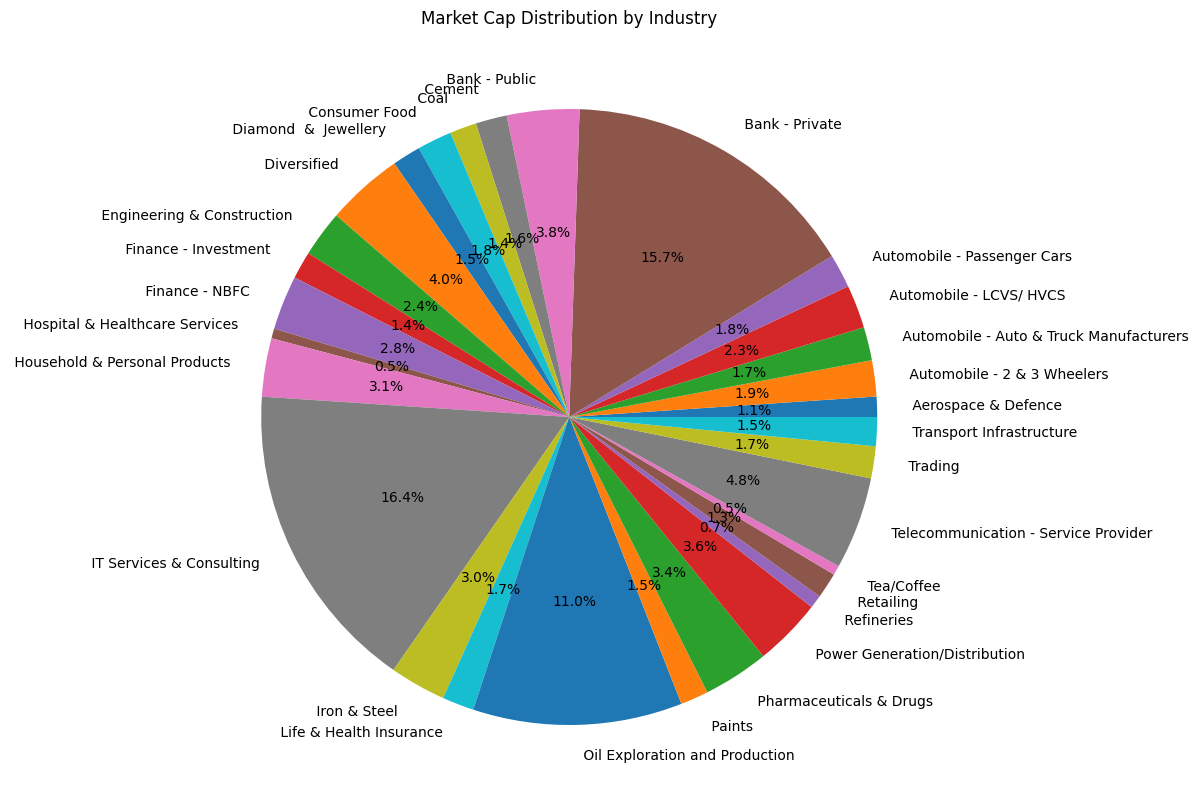

In [10]:
industry_market_cap=stock_data_df.groupby('Industry')['Mkt Cap (Rs. Cr.)'].sum()
plt.figure(figsize=(10,10))
industry_market_cap.plot(kind='pie', autopct='%.1f%%')
plt.title('Market Cap Distribution by Industry')
plt.ylabel('')
plt.show()

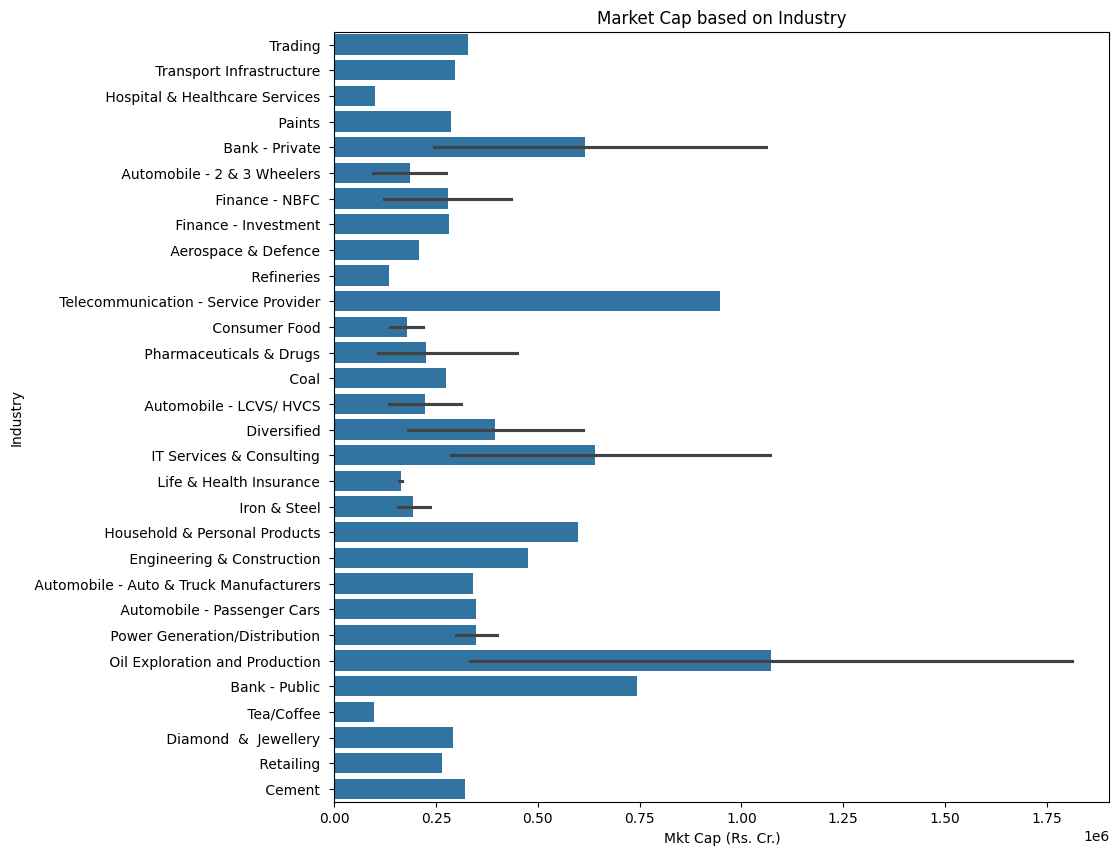

In [13]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Mkt Cap (Rs. Cr.)', y = 'Industry', data = stock_data_df)
plt.title('Market Cap based on Industry')
plt.show()

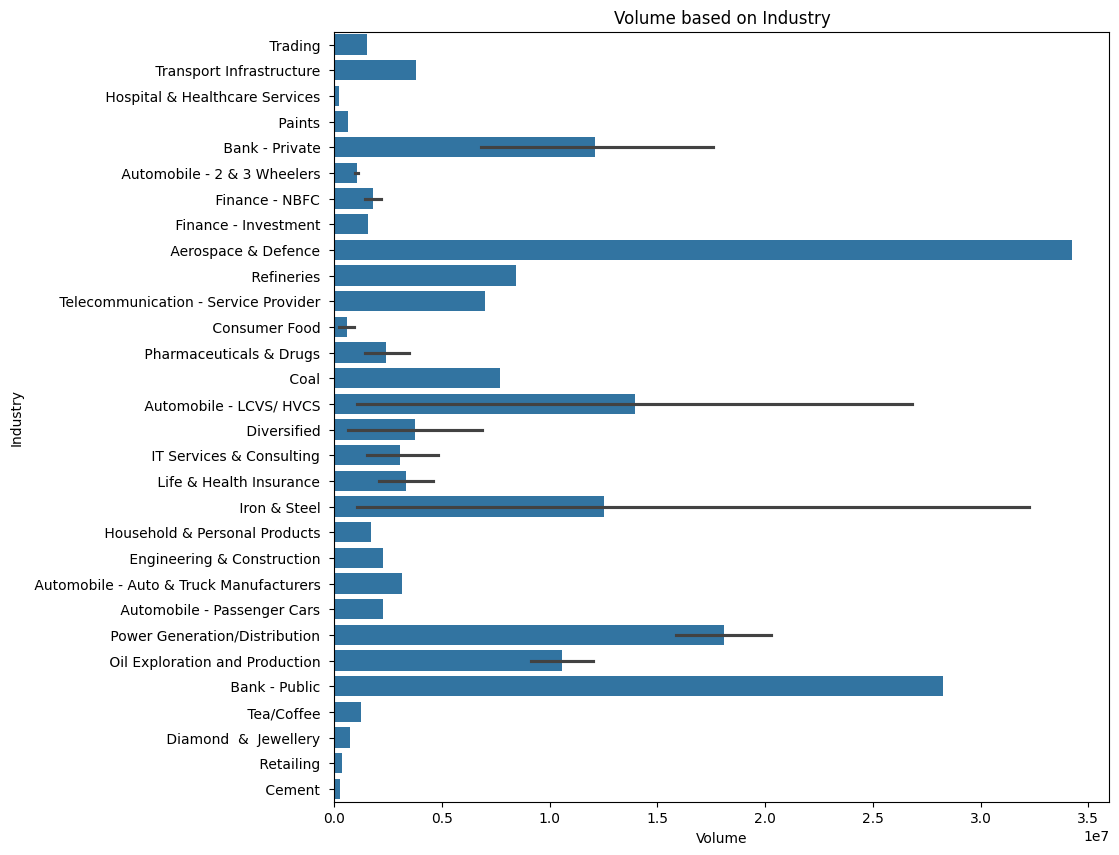

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Volume', y = 'Industry', data = stock_data_df)
plt.title('Volume based on Industry')
plt.show()

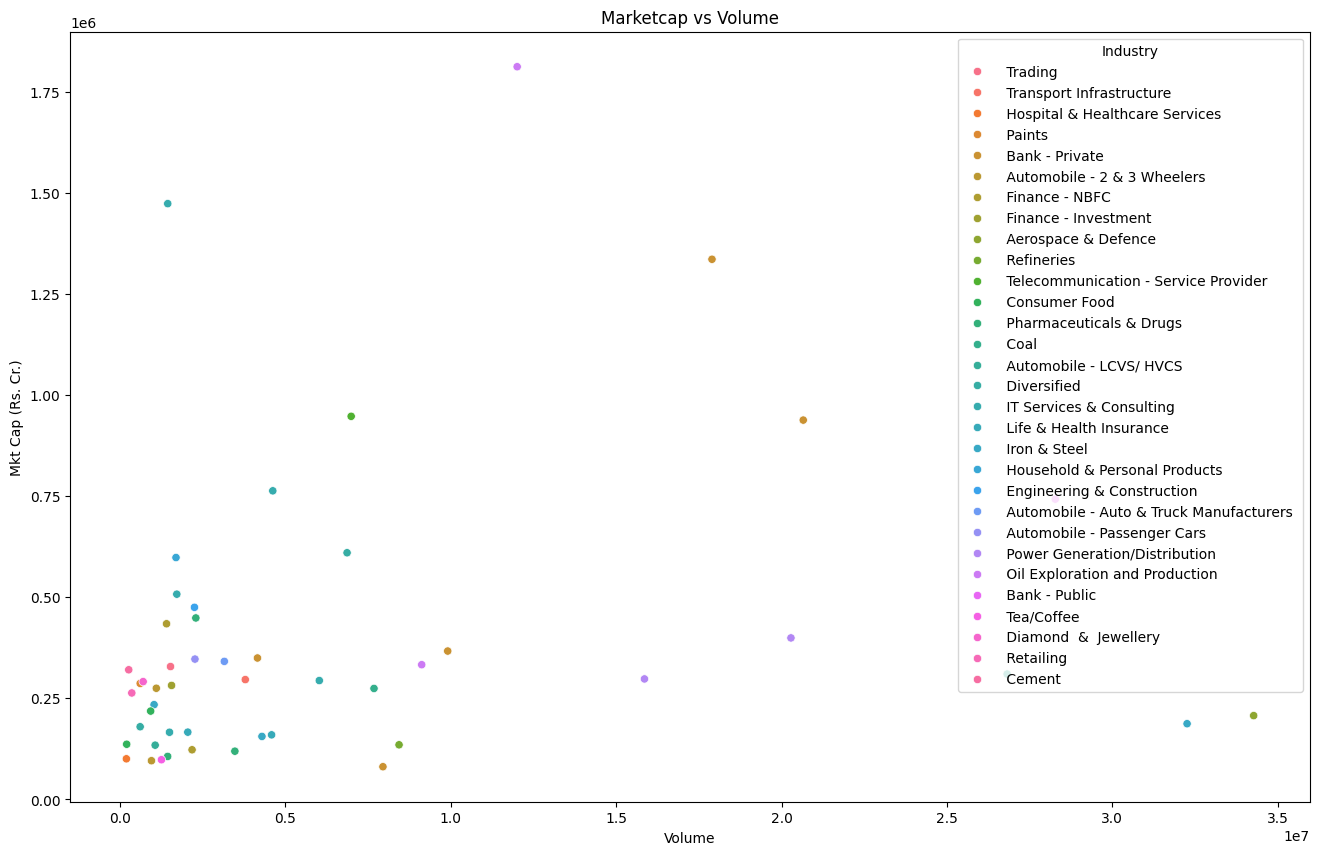

In [15]:
plt.figure(figsize=(16,10))
sns.scatterplot(y='Mkt Cap (Rs. Cr.)',x='Volume',data=stock_data_df,hue='Industry')
plt.title('Marketcap vs Volume')
plt.show()

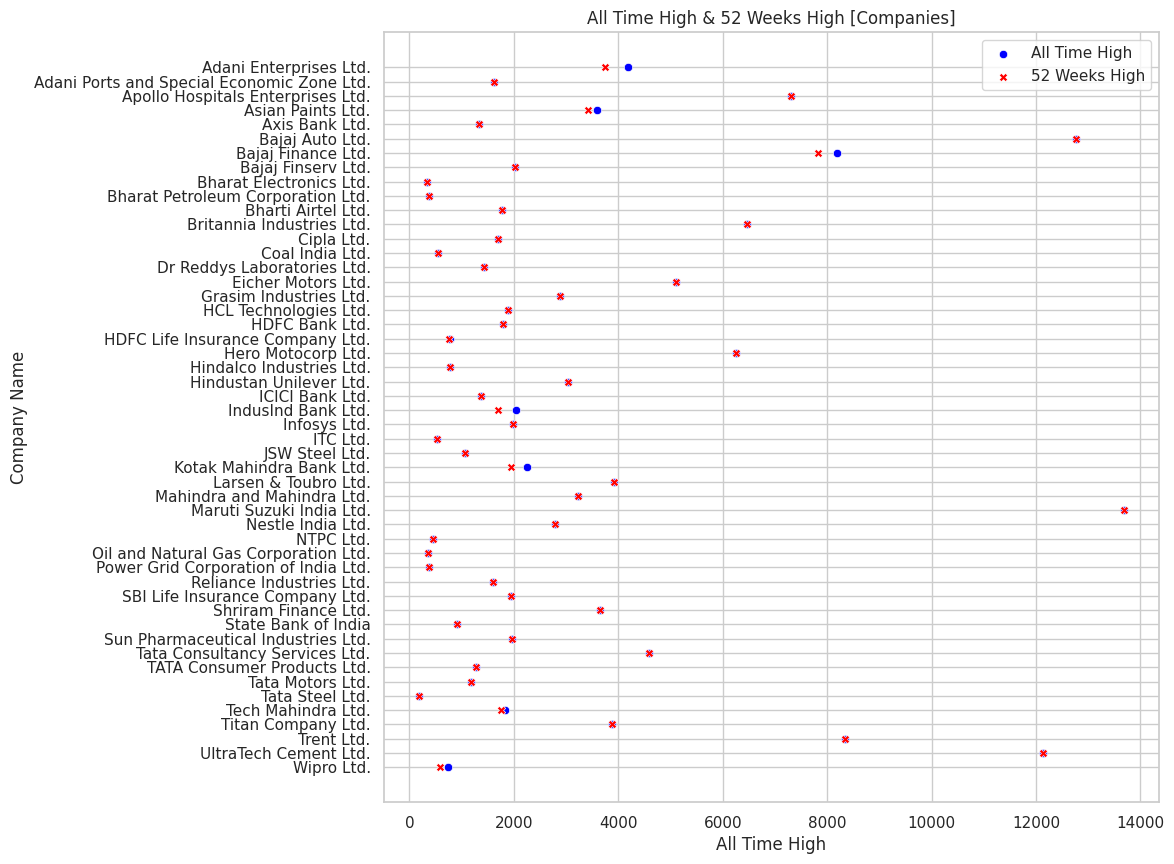

In [16]:
plt.figure(figsize=(10,10))
sns.set(style = 'whitegrid')
sns.scatterplot(y='Company Name',x='All Time High',data=stock_data_df, color='blue', marker='o', label='All Time High')
sns.scatterplot(y='Company Name', x='52 Week High', data=stock_data_df, color='red', marker='X', label='52 Weeks High')
plt.title('All Time High & 52 Weeks High [Companies]')
plt.show()

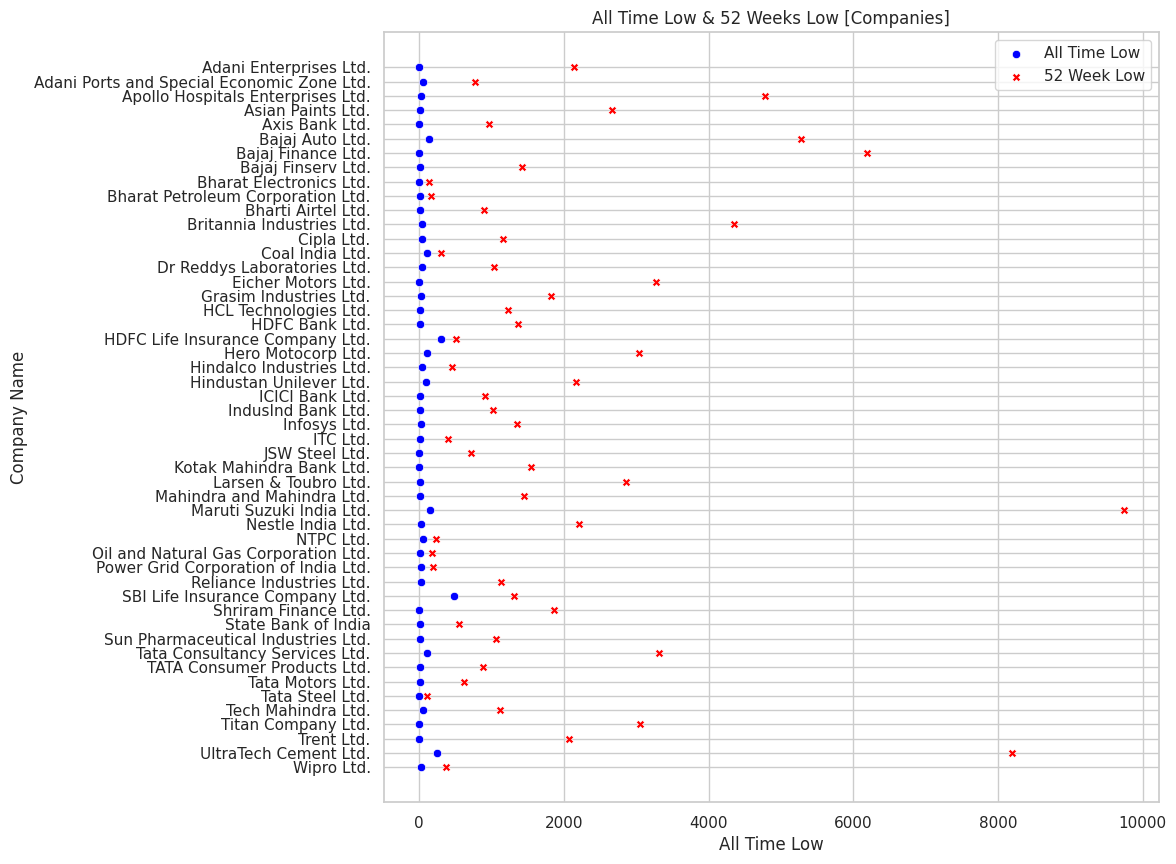

In [17]:
plt.figure(figsize=(10,10))
sns.set(style='whitegrid')
sns.scatterplot(y='Company Name',x='All Time Low',data=stock_data_df,color='blue',marker='o',label='All Time Low')
sns.scatterplot(y='Company Name',x='52 Week Low',data=stock_data_df,color='red',marker='X',label='52 Week Low')
plt.title('All Time Low & 52 Weeks Low [Companies]')
plt.show()

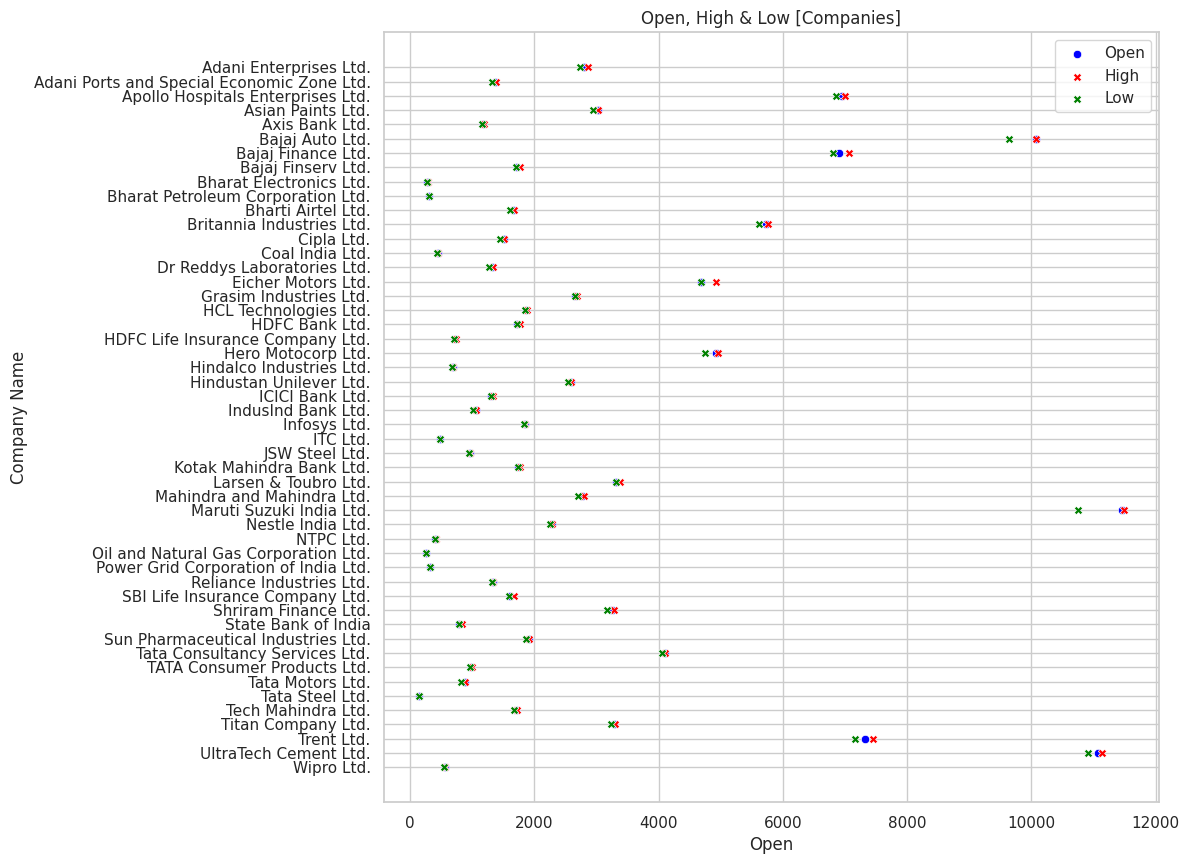

In [18]:
plt.figure(figsize=(10,10))
sns.set(style='whitegrid')
sns.scatterplot(y='Company Name',x='Open',data=stock_data_df,color='blue',marker='o',label='Open')
sns.scatterplot(y='Company Name',x='High',data=stock_data_df,color='red',marker='X',label='High')
sns.scatterplot(y='Company Name',x='Low',data=stock_data_df,color='green',marker='X',label='Low')
plt.title('Open, High & Low [Companies]')
plt.show()